[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Bz2oiMAApkAzAddwOJ8whPaVGwsw6J1u?usp=sharing)

# HW3 - Hubs
### Mac Ambler
### DATA 340-02, Spring 2023
### 03/09/2023

# Q1

*Draw the OpenFlights US flight network graph. Ensure the graph is legible and pretty:*

* *Node labels are visible*
* *Edge crossings are minimized*

## Answer

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_graphml('/content/drive/MyDrive/Network Science/HW3/openflights_usa.graphml.gz')
nx.write_gexf(G, '/content/drive/MyDrive/Network Science/HW3/flights.gexf')

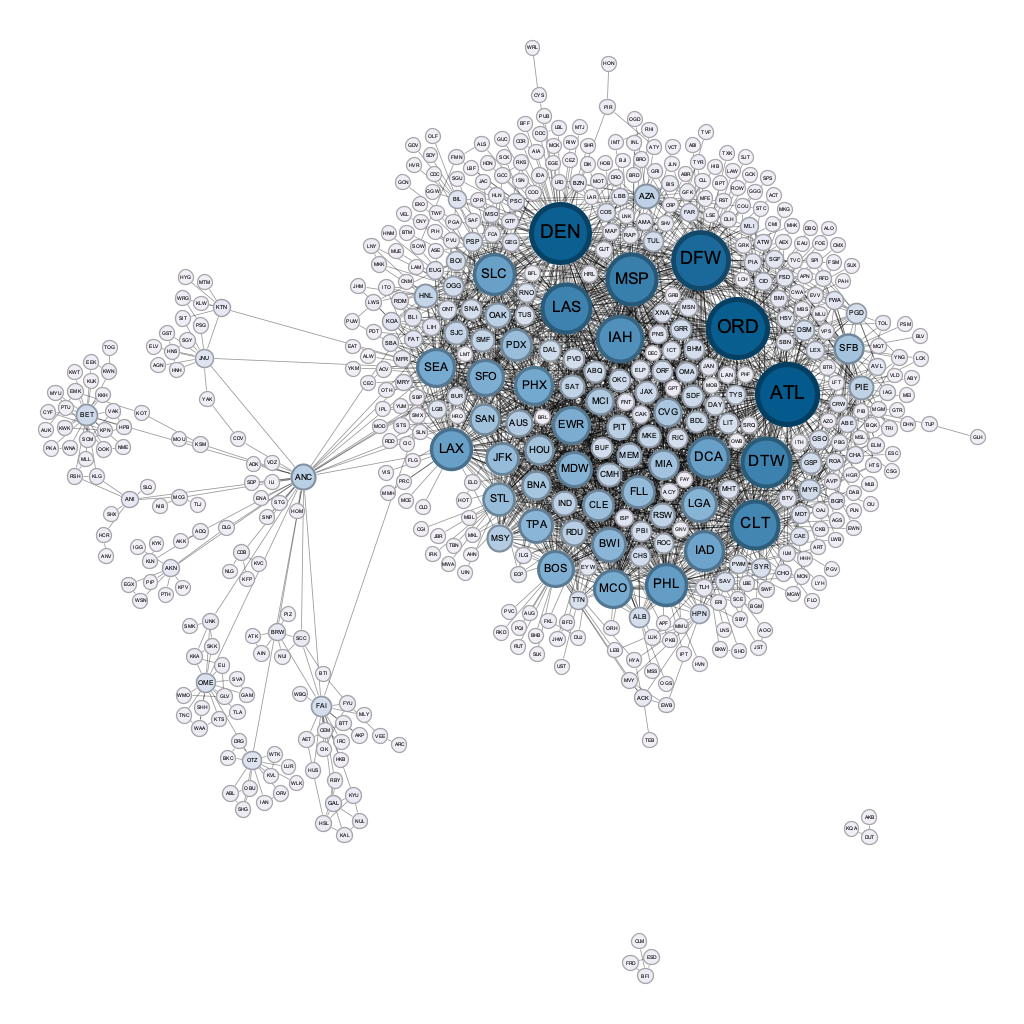

In [3]:
from IPython.display import Image
Image('/content/drive/MyDrive/Network Science/HW3/flights_network.png')

## Discussion

In order to draw the OpenFlights network graph I first imported the network and wrote it to a .gexf file to be opened in Gephi. In Gephi, I next tried to make the nodes standout from the edges by coloring and sizing the nodes by their degrees. I then used ForceAtlas 2 at 0.1 speed with prevent overlap on to make the graph more visible and minimize edge crossings. I finally touched the graph up in the preview panel by turning on node labels, removing curved edges and changing the edge color to black with an opacity of 40%. Then, all that remained was to export the graph as a .png and display it in Colab.

# Q2

* *What is the average number of routes served by each airport in this network?*
* *What are the top five airports in terms of number of routes?*
* *How many airports in this network serve only a single route?*
* *Which airport has the highest closeness centrality?*
* *Which airport has the highest betweenness centrality?*
* *Compute the heterogeneity parameter of this network.*

## Answer

In [4]:
import numpy as np

degrees = []
for i in G.nodes():
  degrees.append(G.degree(i))

print('The avg. number of routes served by each airport in the network is', np.sum(degrees)/len(degrees))

The avg. number of routes served by each airport in the network is 10.186813186813186


In [5]:
degrees = sorted(G.degree(G.nodes()), key = lambda x: x[1], reverse=True)
print('The top five airports in terms of number of routes are:')
print(degrees[0:5])

The top five airports in terms of number of routes are:
[('ATL', 153), ('ORD', 149), ('DEN', 148), ('DFW', 138), ('MSP', 117)]


In [6]:
solo_airports = []
for i in G.nodes():
  if G.degree(i) == 1:
    solo_airports.append(i)

print("Number of airports that serve only a single route =", len(solo_airports))

Number of airports that serve only a single route = 156


In [7]:
closeness = []
for i in G.nodes():
  closeness.append([i,nx.closeness_centrality(G, i)])

closeness = sorted(closeness, key = lambda x: x[1], reverse=True)

print('The airport with the highest closeness centrality is', closeness[0][0], 'with a closeness of', closeness[0][1])

The airport with the highest closeness centrality is DEN with a closeness of 0.5038803683651619


In [8]:
betweenness = nx.centrality.betweenness_centrality(G)
betweenness = sorted(betweenness.items(), key = lambda x: x[1], reverse=True)
print('The airport with the highest betweenness centrality is', betweenness[0][0], 'with a betweenness of', betweenness[0][1])

The airport with the highest betweenness centrality is ANC with a betweenness of 0.3189906081983976


In [9]:
degrees = []
for i in G.nodes():
  degrees.append(G.degree(i))

sq_degrees = []
for i in degrees:
  sq_degrees.append(i**2)

hetero_param = (np.sum(sq_degrees)/len(G.nodes()))/((np.sum(degrees)/len(G.nodes()))**2)
print('Heterogeneity Parameter =', hetero_param)

Heterogeneity Parameter = 5.347494770144302


## Discussion

* First, I import the numpy package in order to access some of its mathematical functions. I then create an empty list named 'degrees' and use a 'for' loop to append the degrees for each node in the network to the list. Finally, I take the sum of 'degrees' and divide it by the number of nodes in the network to get the average degree for the network, which is equivalent to the average number of routes served by the airports.

* In order to get the top five airports by the number of routes served, I created a list called 'degrees' by using the 'sorted()' function to take the degrees of each node in the network and order it by the second element in the sublist (the degree rather than the IATA code) using a lambda function and sort this in reverse order so the highest degrees are at the top. Finally, I printed the first five elements of the list 'degrees'.

* To find all airports that serve only a single route, I first created an empyt list called 'solo_airports'. Then, I used a 'for' loop with a nested 'if' statement to check if the degree of each node in the network is equal to one, and, if so, the IATA code is appended to the list. Finally, I printed the length of the complete 'solo_airports' list.

* To find the airport with the highest closeness centrality, I create an empty list called 'closeness' and use a 'for' loop to compute the closeness of each node in the network and then append this value along with the IATA code to the list. I then use the 'sorted()' function to order 'closeness' by the second element in the sublists (the measured closeness) using a lambda function. This ordering is in reverse order so the largest closeness measures are at the top. Finally, I print the first element in 'closeness'.

* To find the airport with the highest betweenness centrality, I calculate the betweeness of each node in the network using the 'betweenness_centrality()' function and assigning it the name 'betweenness'. I then use the 'sorted()' function to order 'betweenness.items()' by the second element in the sublists (the measured betweenness) using a lambda function. This ordering is in reverse order so the largest betweenness measures are at the top. Finally, I print the first element in 'betweenness'.

* In order to calculate the heterogeneity parameter of the network, I created two empty lists called 'degrees' and 'sq_degrees' and used 'for' loops to append the degrees and squared degrees, respectively, for all nodes in the network to the lists. Finally, I plugged these results into the function given in the 'Chapter 3 - Hubs' powerpoint to compute the heterogeneity parameter for the network.

# References
* Homework 3 - Hubs, <https://github.com/anwala/teaching-network-science/tree/main/spring-2023/homework/hw3>
* data_340_02_s23_chp_03_hubs.ipynb, <https://colab.research.google.com/drive/1yZmGbDk2Nr4NWB3lyYQptRJW_qbASCsb#scrollTo=qqHyuSOPCn2L>
* 03_chapter_3_hubs.pptx, <https://docs.google.com/presentation/d/1tLmfSeHDk5tl8a0mOpauSzjISHz202xL/edit#slide=id.p16>
* Saving a Networkx graph in GEXF format and visualize using Gephi, <https://www.geeksforgeeks.org/saving-a-networkx-graph-in-gexf-format-and-visualize-using-gephi/>
* How can I open images in a Google Colaboratory notebook cell from uploaded png files?, <https://stackoverflow.com/questions/49478791/how-can-i-open-images-in-a-google-colaboratory-notebook-cell-from-uploaded-png-f>
* Python program to sort a list according to the second element in the sublist., <https://www.tutorialspoint.com/python-program-to-sort-a-list-according-to-the-second-element-in-the-sublist>
* Sort Dictionary by Value in Python – How to Sort a Dict, <https://www.freecodecamp.org/news/sort-dictionary-by-value-in-python/>